## Implementation

The below code fragment implements a `LinearRegression` classifier using a basic Gradient Descent procedure.

## Computing Gradients

We have an MSE loss function $\frac{1}{n} \sum (y - f(x))^2$.

Where function $f(x) = xW + b$.

We now calculate partial derivatives of the loss function with respect to weights and a bias.

Let us first calculate the derivative of one square difference w.r.t. $W$:

\begin{align}
    ((y - f(x))^2)' &= ((y - (xW + b))^2)'\\
                    &= 2 * (y - (xW + b)) * (y - (xW + b))'\\
                    &= 2 * (y - (xW + b)) * (0 - (x + 0))\\
                    &= 2 * (y - (xW + b)) * (-x)\\
                    &= -2x * (y - (xW + b))
\end{align}

Then the total derivative will be $-2 * dot(y - f(x), x)\ /\ n$.

Let us now calculate the derivative of one square difference w.r.t. $b$:

\begin{align}
    ((y - f(x))^2)' &= ((y - (xW + b))^2)'\\
                    &= 2 * (y - (xW + b)) * (y - f(xW + b))'\\
                    &= 2 * (y - (xW + b)) * (0 - (0 + 1))\\
                    &= 2 * (y - (xW + b)) * (-x)\\
                    &= -2 * (y - (xW + b))
\end{align}

Then the total derivative will be $-2 * sum(y - f(x))\ /\ n$.

In [3]:
import numpy as np

from dataclasses import dataclass


@dataclass
class LinearRegression:
    features: np.ndarray
    labels: np.ndarray
    learning_rate: float
    epochs: int
    logging: bool

    def __post_init__(self) -> None:
        """Initializes additional variables for the Linear Regression model."""

        self.num_samples, num_features = self.features.shape
        self.weights, self.bias = np.zeros(num_features), 0

    def fit(self) -> None:
        """Fits a Linear Regression model."""

        for _ in range(self.epochs):
            residuals = self.labels - self.predict(self.features)

            d_weights = -2 / self.num_samples * residuals.dot(self.features)
            d_bias = -2 / self.num_samples * residuals.sum()

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            if self.logging:
                print(f"MSE Loss: {(residuals ** 2).mean():.3f}")

    def predict(self, features: np.ndarray) -> np.ndarray:
        """Performs inference using the given features."""

        return features.dot(self.weights) + self.bias

## Generate Fake Data

We generate some fake training and test data to approximate function $f(x) = 2x$.

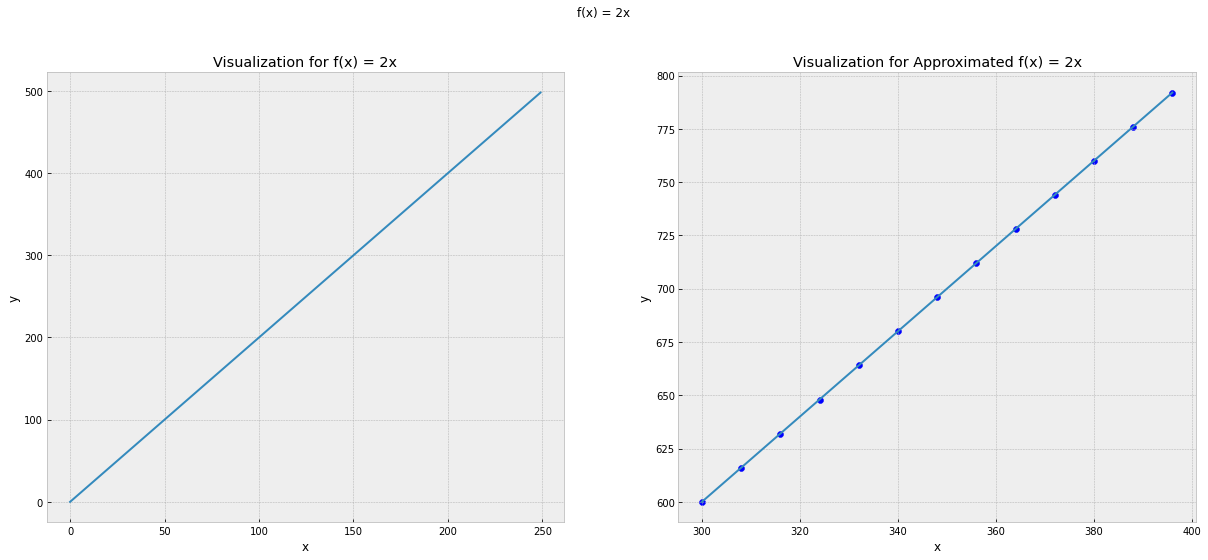

In [4]:
import matplotlib.pyplot as plt

plt.style.use("bmh")

# Training dataset
train_features = np.arange(0, 250).reshape(-1, 1)
train_labels = np.arange(0, 500, 2)

# Testing dataset
test_features = np.arange(300, 400, 8).reshape(-1, 1)
test_labels = np.arange(600, 800, 16)

linear_regression = LinearRegression(
    train_features, train_labels, epochs=75, learning_rate=1e-5, logging=False
)
linear_regression.fit()

# Plot the data
fig, axs = plt.subplots(1, 2)
fig.suptitle("f(x) = 2x")
fig.tight_layout()
fig.set_size_inches(18, 8)

axs[0].set_title("Visualization for f(x) = 2x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].plot(train_features, train_labels)

axs[1].set_title("Visualization for Approximated f(x) = 2x")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].scatter(test_features, test_labels, color="blue")
axs[1].plot(test_features, linear_regression.predict(test_features))

plt.show();